In [8]:
import numpy as np
import cv2
import matplotlib. pyplot as plt

lines = cv2.imread("lines.jpg", 0)
spiral = cv2.imread("spiral.jpg", 0)



def showImage(Img, window_name='image'):
    cv2.imshow(window_name, Img)

    cv2.waitKey(0)

    # closing all open windows
    cv2.destroyAllWindows()

    


1. General Edge Detection

in the cell bellow includes
1.1 steps smooth your image using the GaussianBlur(method)
1.2 sobel edge Detection Mask
1.3 

an easier implementation would be to use 
img_dx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
img_dy = cv2.Sobel(img, cv2.CV_32F, 0, 1)


In [9]:
# 1. General Edge Detection

# 1.1 steps smooth your image using the GaussianBlur(method)
def grayscale(image):
    image=image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image
def blur(image):
    image=image.copy()
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    return blur


# 1.2 Define Orthogonal mask Sobel Method & 1.3  Get the x- and y- gradient Image
def sobel(image):
    sobelX = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # G1 SobelX 3X3 mask

    sobelY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # G1 SobelY 3x3 mask from PPt

    resultX = cv2.filter2D((blur(image)), -1, sobelX)
    resultY = cv2.filter2D((blur(image)), -1, sobelY)
    return resultX, resultY
    # showImage(resultX, "Sobel Horizontal Image")
    # showImage(resultY, "Sobel Vertical Image")


resultX, resultY = sobel(np.uint8(spiral))

showImage(resultX, "Sobel Horizontal Image")
showImage(resultY, "Sobel Horizontal Image")

print("pass")

pass


1.4 Gradient Magnitude G(i,j) = magnitude of x 1st derivative + magnitude of y 1st derivative


In [10]:

# 1.4 Gradient Magnitude G(i,j) = magnitude of x 1st derivative + magnitude of y 1st derivative

def gradient(image):
    image=image.copy()
    
    image=blur(image)
    I_x, I_y = sobel(image)
    

    result = cv2.add(I_x, I_y)
    

    return result

img = gradient(np.uint8(spiral))
showImage(img, "Gradient Magnitude")



print('Pass')

Pass


General Edge Detection 
1.5  Threshold your gradient image by marking all pixels in 𝑰(𝑖,𝑗) as edges if 𝑮(𝑖,𝑗) > 𝝉 .

In [11]:
#Tracbar for sobel 

img = spiral
img = blur(img)

thresh1 = 18
cv2.namedWindow('Sobel')


#image should be loaded in as grayscale and already blured
def funcGradient(thres1 = 0):
    threshold = cv2.getTrackbarPos("T","Sobel")
    
    I_x, I_y = sobel(spiral)

    image = cv2.add(I_x, I_y) #to used cv2.add instead of  cv2.magnitude because dtype is unit8
    ret, thresh1 = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    cv2.imshow('Sobel', thresh1)
    return thresh1

cv2.createTrackbar('T', 'Sobel', thresh1, 255, funcGradient)
funcGradient(0)

cv2.waitKey(0)

cv2.destroyAllWindows()


In [12]:
#2.1 Canny Edge Detection example for Spiral

window = "canny"
def funcCan(thresh1 = 0):
    thresh1 = cv2.getTrackbarPos('thresh1', 'canny') 
    thresh2 = cv2.getTrackbarPos('thresh2', 'canny')
    edge = cv2.Canny(img, thresh1, thresh2)  #creates the canny image
    cv2.imshow('canny', edge)
    return edge


original = np.uint8(spiral) #redundant
img = original.copy()
img = blur(img)

cv2.namedWindow('canny')

thresh1 = 100
thresh2 = 1
cv2.createTrackbar('thresh1', 'canny', thresh1, 255, funcCan)
cv2.createTrackbar('thresh2', 'canny', thresh2, 255, funcCan)
funcCan(0)

cv2.waitKey(0)

cv2.destroyAllWindows()



3. Comparison of General and Canny Edge Detectors

the output of the code below is a graph coomparing both Edge detctors for the spiral staircase, 
Note it works it just takes really long to load

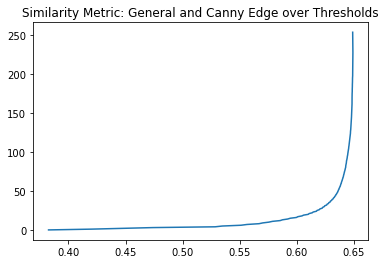

In [13]:
#3  Compare Canny to Sobel
height, width= spiral.shape[0],spiral.shape[0]
#canny

edge = cv2.Canny(blur(spiral), 100, 52)
#Sobel 




def Comparison(threshold =50):
    i=0
    #for Canny let thresh1 =100 thresh2 =52
    I_x, I_y = sobel(blur(spiral))
    result = cv2.add(I_x, I_y)
    ret, image = cv2.threshold(result, threshold, 255, cv2.THRESH_BINARY)
    
    for y in range(height): # loop through image pixels and increment counter if sobel and canny have same value
        for x in range(width):
            
            if image[y,x]==edge[y,x]:#compare canny and Sobel
                i+=1
   
    
    return i/spiral.size

Comparison(10)


def Graphing():
    y=[]
    x=[]
    for i in range(0,255):
        x.append(Comparison(i))
        y.append(i)
    

    plt.plot(x, y)
    plt.title("Similarity Metric: General and Canny Edge over Thresholds")
    plt.show()
Graphing()
    
    
      


I'm aware my graph is wrong I'm  not sure why, I should be getting a bell cure as
there it is positional informaiton